Function to get the sites

In [3]:
def getsites(url):
    """
    extract html source code from a given url
    """
    # retrieve the data
    filedata = urllib.request.urlopen(url)
    # read as bytes
    bytes_text = filedata.read()
    # decode bytes to string
    thing = bytes_text.decode("utf-8")
    return thing

In [4]:
import urllib
import re
from collections import OrderedDict

def find_profmovies(n, o):
    """
    iterates through a given list
    """
    totallist = []
    codes = []
    for i in range(n,o):
        url = "https://www.imdb.com/search/keyword/?keywords=professor&mode=detail&page="+ str(i)+"&ref_=kw_nxt&sort=moviemeter,asc&title_type=movie"
        # retrieve the data
        filedata = urllib.request.urlopen(url)
        # read as bytes
        bytes_text = filedata.read()
        # decode bytes to string
        html = bytes_text.decode("utf-8")
        
        pattern = r'alt="(.*)"'
        totallist += re.findall(pattern, html)
        
        pattern2 = r'<a href="/title/([\w]+)/'
        codes += re.findall(pattern2, html)
        
    codes = list(OrderedDict.fromkeys(codes))
    
    if len(totallist) == len(codes):
        D = {}
        for j in range(len(totallist)):
            D[totallist[j]] = codes[j]
    else:
        print("Lengths aren't equal")
            
        
    return totallist, codes, D
movies, codes, Dcodes = find_profmovies(1, 28)

        
        

In [23]:
def gen_urls(movies, L):
    urls = []
    Dcast = {}
    for i in range(len(L)):
        urls.append("https://www.imdb.com/title/" + str(L[i]) + "/fullcredits?ref_=tt_cl_sm#cast")
        Dcast[movies[i]] = urls[i]
    return urls, Dcast
    
urls, Dcast = gen_urls(movies, codes)

In [561]:
codes

['tt0241527',
 'tt4154796',
 'tt0816692',
 'tt1375666',
 'tt4123430',
 'tt3281548',
 'tt7040874',
 'tt0330373',
 'tt1201607',
 'tt0304141',
 'tt0055928',
 'tt0373889',
 'tt0056193',
 'tt0097576',
 'tt0082971',
 'tt5726616',
 'tt0417741',
 'tt1638355',
 'tt0295297',
 'tt3371366',
 'tt0119217',
 'tt0119558',
 'tt3315342',
 'tt4779682',
 'tt0848228',
 'tt2802144',
 'tt0363771',
 'tt4209788',
 'tt0097165',
 'tt2395427',
 'tt0087332',
 'tt0268978',
 'tt3402236',
 'tt6806448',
 'tt1502712',
 'tt0800369',
 'tt2084970',
 'tt2543164',
 'tt4827558',
 'tt0770828',
 'tt2798920',
 'tt3385516',
 'tt2872732',
 'tt0032138',
 'tt1270798',
 'tt0120903',
 'tt6565702',
 'tt0041716',
 'tt0338751',
 'tt1959563',
 'tt0363163',
 'tt0319262',
 'tt2345759',
 'tt0116629',
 'tt2980516',
 'tt1663662',
 'tt10481868',
 'tt0250494',
 'tt0382625',
 'tt0265666',
 'tt1877832',
 'tt0887912',
 'tt3062096',
 'tt0413300',
 'tt0072431',
 'tt2274648',
 'tt0367882',
 'tt5095030',
 'tt1187043',
 'tt0289879',
 'tt5886046',
 'tt0

In [61]:
urls[0]

'https://www.imdb.com/title/tt0241527/fullcredits?ref_=tt_cl_sm#cast'

Make a function which takes in the list of urls and outputs a list of dictionaries which containes the data. The function will iterate and access through the urls. Each sub function will execute only on that given iteration

In [48]:
import time

In [342]:
def create_data(urls, x, skip = False):
    data = {}
    no_profs = []
    count = 0
    # iterate through the inputed range
    for i in range(x):
        start_time = time.time()
        
        
        current_page = getsites(urls[i]) #set the cast page to search
        
        try:
            actors_dict = get_actors(current_page)
        except:
            continue
            
        try:
            movie_year = get_years(current_page)
        except IndexError:
            continue
            
        if (len(actors_dict) == 0) and (skip == True):
            print("skipping")
            no_profs.append(movies[i])
            continue
        elif len(actors_dict) != 0:
            for j in list(actors_dict.keys()): 
                movie_info = {}
                movie_info["Name"] = movies[i]
                movie_info["Number"] = i #number of movie
                movie_info["Year"] = movie_year #set year to year of movie
                movie_info["Actor"] = j  #set actors to a dict of actors and their charachters
                movie_info["Role"] = actors_dict[j]
                data[count] = movie_info #set key in data equal to movie name and value equal to the dictionary of movie info
                count += 1
            print("--- %s seconds ---" % round((time.time() - start_time), 2))
        elif len(actors_dict) == 0:
            movie_info = {}
            movie_info["Name"] = movies[i]
            movie_info["Number"] = i #number of movie
            movie_info["Year"] = movie_year
            data[count] = movie_info 
            print("None --- %s seconds ---" % round((time.time() - start_time), 2))
            no_profs.append(movies[i])
            count += 1
        
    
    return data, no_profs
       
         

In [464]:
plswork, no_profs = create_data(urls, 1000, skip = True)

--- 6.52 seconds ---
skipping
--- 12.35 seconds ---
skipping
skipping
skipping
skipping
skipping
--- 13.39 seconds ---
--- 4.54 seconds ---
--- 2.48 seconds ---
skipping
skipping
--- 2.74 seconds ---
skipping
skipping
--- 5.1 seconds ---
skipping
--- 6.54 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
--- 2.61 seconds ---
--- 2.42 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
--- 2.92 seconds ---
--- 6.76 seconds ---
--- 2.17 seconds ---
skipping
--- 1.81 seconds ---
--- 1.65 seconds ---
skipping
--- 1.74 seconds ---
skipping
skipping
skipping
skipping
skipping
--- 4.49 seconds ---
skipping
--- 1.39 seconds ---
--- 4.46 seconds ---
skipping
skipping
--- 1.77 seconds ---
skipping
--- 2.92 seconds ---
skipping
skipping
--- 1.65 seconds ---
--- 1.92 seconds ---
skipping
skipping
--- 2.03 seconds ---
skipping
--- 2.04 seconds ---
skipping
skipping
skipping
skipping
--- 2.92 second

skipping
skipping
skipping
--- 1.8 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
--- 2.22 seconds ---
--- 1.52 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
--- 1.98 seconds ---
skipping
skipping
skipping
skipping
skipping
--- 1.98 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
--- 1.91 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
skipping
--- 1.69 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
--- 2.62 seconds ---
skipping
skipping
skipping
skipping
--- 3.37 seconds ---
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
sk

In [104]:
import json

In [465]:
print(json.dumps(plswork, sort_keys=False, indent=4))

{
    "0": {
        "Name": "Harry Potter and the Sorcerer's Stone",
        "Number": 0,
        "Year": "2001",
        "Actor": "Maggie Smith",
        "Role": "Professor McGonagall"
    },
    "1": {
        "Name": "Harry Potter and the Sorcerer's Stone",
        "Number": 0,
        "Year": "2001",
        "Actor": "Richard Harris",
        "Role": "Professor Quirrell"
    },
    "2": {
        "Name": "Harry Potter and the Sorcerer's Stone",
        "Number": 0,
        "Year": "2001",
        "Actor": "Warwick Davis",
        "Role": "Professor Flitwick"
    },
    "3": {
        "Name": "Harry Potter and the Sorcerer's Stone",
        "Number": 0,
        "Year": "2001",
        "Actor": "Alan Rickman",
        "Role": "Professor Snape"
    },
    "4": {
        "Name": "Interstellar",
        "Number": 2,
        "Year": "2014",
        "Actor": "Michael Caine",
        "Role": "Professor Brand"
    },
    "5": {
        "Name": "Harry Potter and the Deathly Hallows: Part 2"

In [268]:
no_profs

['Avengers: Endgame',
 'Inception',
 'Fantastic Beasts: The Crimes of Grindelwald',
 'Little Women',
 'A Simple Favor',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Order of the Phoenix',
 'Lolita',
 'Raiders of the Lost Ark',
 'Call Me by Your Name',
 'The Man from U.N.C.L.E.',
 'Transformers: The Last Knight']

In [447]:
def get_years(page):
    pattern = r'<title>[^(]+\((\d{4})'
    year = re.findall(pattern, page)
    try:
        return year[0]
    except IndexError:
        return None

In [122]:
def get_actors(page):
    D = {} #dictionary of actors name and the characters they play
    
    #returns a list of tuples. Tuple format is: (inaccutate code, character name)
    pattern= '(nm[0-9]+)[A-z0-9_\?\=]+\" >(Prof[A-z\s]+)'
    results = re.findall(pattern, page) 
               
    for z in range(len(results)): # for each results
        #correct inaccuarte codes
        results[z] = list(results[z])
        pattern4 = '(' + results[z][0] + '[0-9])'
        cast_code = re.findall(pattern4, page)
        results[z][0] = cast_code[0] #update the first value of each tuple to correct code

        #navigate and extract each site
        newurl = "https://www.imdb.com/name/" + results[z][0] +"/"
        membersite = getsites(newurl)

        pattern2 = r"<title>([A-z\s]+)"
        actor = re.findall(pattern2, membersite)[0] #find actor's name
        D[actor[:-1]] = results[z][1] #set dictionary key of actors name and the value the name of their character
    return D

In [27]:
def get_actors(urls):
    for x in range(len(urls)):
        D = {}
        pattern3 = '(nm[0-9]+)[A-z0-9_\?\=]+\" >(Prof[A-z\s]+)'
        thing = getsites(urls[x])
        results = re.findall(pattern3, thing)

        for z in range(len(results)):
            results[z] = list(results[z])
            pattern4 = '(' + results[z][0] + '[0-9])'
            cast_code = re.findall(pattern4, thing)
            results[z][0] = cast_code[0]

            newurl = "https://www.imdb.com/name/" + results[z][0] +"/"
            membersite = getsites(newurl)

            pattern5 = r"<title>([A-z\s]+)"
            actor = re.findall(pattern5, membersite)[0]
            D[actor[:-1]] = results[z][1]
        prof_list.append(D)

In [300]:
def expand_actors(entry):
    output = entry
    current_movies = list(output.keys())
    print(current_movies)
    for i in current_movies:
        active_dict = output[i]["Actors"]
        current_actors = list(active_dict.keys())
        for j in range(len(current_actors)):
            output[i][current_actors[j]] = list(output[i]["Actors"].values())[j]
        del output[i]["Actors"]
    return output
    

In [301]:
expand_actors(plswork)

["Harry Potter and the Sorcerer's Stone", 'Avengers: Endgame', 'Interstellar', 'Inception', 'Fantastic Beasts: The Crimes of Grindelwald', 'Little Women', 'A Simple Favor', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Deathly Hallows: Part 2', 'Harry Potter and the Prisoner of Azkaban', 'Dr. No', 'Harry Potter and the Order of the Phoenix', 'Lolita', 'Indiana Jones and the Last Crusade', 'Raiders of the Lost Ark', 'Call Me by Your Name', 'Harry Potter and the Half-Blood Prince', 'The Man from U.N.C.L.E.', 'Harry Potter and the Chamber of Secrets', 'Transformers: The Last Knight']


{"Harry Potter and the Sorcerer's Stone": {'Number': 0,
  'Year': '2001',
  'Maggie Smith': 'Professor McGonagall',
  'Richard Harris': 'Professor Quirrell',
  'Warwick Davis': 'Professor Flitwick',
  'Alan Rickman': 'Professor Snape'},
 'Avengers: Endgame': {'Number': 1, 'Year': '2019'},
 'Interstellar': {'Number': 2,
  'Year': '2014',
  'Michael Caine': 'Professor Brand'},
 'Inception': {'Number': 3, 'Year': '2010'},
 'Fantastic Beasts: The Crimes of Grindelwald': {'Number': 4, 'Year': '2018'},
 'Little Women': {'Number': 5, 'Year': '2019'},
 'A Simple Favor': {'Number': 6, 'Year': '2018'},
 'Harry Potter and the Goblet of Fire': {'Number': 7, 'Year': '2005'},
 'Harry Potter and the Deathly Hallows: Part 2': {'Number': 8,
  'Year': '2011',
  'Michael Gambon': 'Professor Albus Dumbledore',
  'Alan Rickman': 'Professor Severus Snape',
  'Warwick Davis': 'Professor Filius Flitwick',
  'Maggie Smith': 'Professor Minerva McGonagall',
  'Jim Broadbent': 'Professor Horace Slughorn',
  'Miri

In [73]:
prof_list = []
no_profs = []
actors_list = []
for x in range(2):
    D = { str(x+1) + ". Movie" : movies[x]}
    pattern3 = '(nm[0-9]+)[A-z0-9_\?\=]+\" >(Prof[A-z\s\.]+)'
    thing = getsites(urls[x])
    results = re.findall(pattern3, thing)
    
    if len(results) == 0:
        no_profs.append(str(x) + ". " + movies[x])
        continue
        

    for i in range(len(results)):
        results[i] = list(results[i])
        pattern4 = '(' + results[i][0] + '[0-9])'
        cast_code = re.findall(pattern4, thing)
        results[i][0] = cast_code[0]

        newurl = "https://www.imdb.com/name/" + results[i][0] +"/"
        membersite = getsites(newurl)

        pattern5 = r"<title>([A-z\s]+)"
        actor = re.findall(pattern5, membersite)[0][:-1]
        if actor not in actors_list:
            D[actor] = results[i][1]
            actors_list.append(actor)
        else:
            continue
    prof_list.append(D)

In [183]:
def addto_prof_list(entry):
    output = entry
    flag = True
    while flag == True:
        print("\nType 'EE' to exit")
        first = input("Enter movie or Index Number: ")
        
        if first == "EE":
            flag = False
            break
        try:
            first = int(first)
            activemovie = output[movies[first]]
            try:
                print("---- " + movies[first] + " ----") 
            except IndexError:
                print("Movie does not exist")
        except ValueError: 
            try: 
                activemovie = entry[first]
                print("---- " + first + " ----") 
            except KeyError:
                print ("Movie does not exist")
           
        D = {}

        while True:
            print("\n*** Type FFF to exit Actor Role Entry ***")
            actor = input("Input Actor Name: ")
            
            if actor == "EE":
                flag = False
                break
                
            elif actor == "FFF":
                break
                
            role = input("Input Role: ")
            D[actor] = role
            
        print(D)
        activemovie["Actors"] = D
        
    return output

In [184]:
addto_prof_list(plswork)

Type 'EE' to exit
Enter movie or Index Number: 1
---- Avengers: Endgame ----
*** Type FFF to exit Actor Role Entry ***
Input Actor Name: Mark Rufallo
Input Role: Prof Bruce Banner
*** Type FFF to exit Actor Role Entry ***
Input Actor Name: FFF
{'Mark Rufallo': 'Prof Bruce Banner'}
Type 'EE' to exit
Enter movie or Index Number: 3
---- Inception ----
*** Type FFF to exit Actor Role Entry ***
Input Actor Name: Michael Caine
Input Role: Prof Stephen Miles
*** Type FFF to exit Actor Role Entry ***
Input Actor Name: FFF
{'Michael Caine': 'Prof Stephen Miles'}
Type 'EE' to exit
Enter movie or Index Number: EE


{"Harry Potter and the Sorcerer's Stone": {'Number': 1,
  'Year': '2001',
  'Actors': {'Maggie Smith': 'Professor McGonagall',
   'Richard Harris': 'Professor Quirrell',
   'Warwick Davis': 'Professor Flitwick',
   'Alan Rickman': 'Professor Snape'}},
 'Avengers: Endgame': {'Number': 2,
  'Year': '2019',
  'Actors': {'Mark Rufallo': 'Prof Bruce Banner'}},
 'Interstellar': {'Number': 3,
  'Year': '2014',
  'Actors': {'Michael Caine': 'Professor Brand'}},
 'Inception': {'Number': 4,
  'Year': '2010',
  'Actors': {'Michael Caine': 'Prof Stephen Miles'}},
 'Fantastic Beasts: The Crimes of Grindelwald': {'Number': 5,
  'Year': '2018',
  'Actors': {}},
 'Little Women': {'Number': 6, 'Year': '2019', 'Actors': {}},
 'A Simple Favor': {'Number': 7, 'Year': '2018', 'Actors': {}},
 'Harry Potter and the Goblet of Fire': {'Number': 8,
  'Year': '2005',
  'Actors': {}},
 'Harry Potter and the Deathly Hallows: Part 2': {'Number': 9,
  'Year': '2011',
  'Actors': {'Michael Gambon': 'Professor Albus D

Testing to see how you can add dictionaries to the existing thing

In [263]:
plswork.keys()

dict_keys(["Harry Potter and the Sorcerer's Stone", 'Interstellar'])

In [185]:
male = getsites("https://media.geeksforgeeks.org/wp-content/uploads/male.txt").split("\n")
female = getsites("https://media.geeksforgeeks.org/wp-content/uploads/female.txt").split("\n")

In [454]:
def determine_gender(name):
    try:
        name = name.split()[0]
    except IndexError:
        return None
    name = name[0].upper() + name[1:]
    if name in male and name in female:
        return "Both"
    elif name in male:
        return "Male"
    elif name in female:
        return "Female"
    else:
        return "Unknown"

In [258]:
def gender_data(entry):
    output = entry
    unknown_list = []
    
    for i in range(len(output)):
 
        try:
            current_dict = output[movies[i]]
        except KeyError:
            continue
            
        actor_list = current_dict["Actors"]
            
        current_dict["Males"], current_dict["Females"],current_dict["Unknown"] = 0,0,0
        for actor in list(actor_list.keys()):
            name = actor.split()[0]
            if name in male:
                current_dict["Males"] += 1
            elif name in female:
                current_dict["Females"] += 1
            else:
                unknown_list.append(actor)
                output[movies[i]]["Unknown"] += 1

    return output, unknown_list

In [358]:
determine_gender("Douglas Andrew Brown Jr.")

['Douglas']


'Male'

In [116]:
import pandas as pd

In [223]:
dummy = plswork
dummy[movies[0]]["Gender"] = "hello"
dummy

{"Harry Potter and the Sorcerer's Stone": {'Number': 0,
  'Year': '2001',
  'Actors': {'Maggie Smith': 'Professor McGonagall',
   'Richard Harris': 'Professor Quirrell',
   'Warwick Davis': 'Professor Flitwick',
   'Alan Rickman': 'Professor Snape'},
  'Gender': 'hello'},
 'Interstellar': {'Number': 2,
  'Year': '2014',
  'Actors': {'Michael Caine': 'Professor Brand'}}}

In [466]:
with open('data.json', 'w') as fp:
    json.dump(plswork, fp)

In [543]:
pandapanda = pd.read_json("data.json")
df = pandapanda.transpose()
df["Gender"] = df.dropna()["Actor"].apply(determine_gender)
df

,Name,Number,Year,Actor,Role,Gender
0,Harry Potter and the Sorcerer's Stone,0,2001,Maggie Smith,Professor McGonagall,Female
1,Harry Potter and the Sorcerer's Stone,0,2001,Richard Harris,Professor Quirrell,Male
2,Harry Potter and the Sorcerer's Stone,0,2001,Warwick Davis,Professor Flitwick,Unknown
3,Harry Potter and the Sorcerer's Stone,0,2001,Alan Rickman,Professor Snape,Male
4,Interstellar,2,2014,Michael Caine,Professor Brand,Male
...,...,...,...,...,...,...
207,College Confidential,926,1960,Herbert Marshall,Professor Henry Addison,Male
208,Tim Tyler's Luck,929,1937,Al Shean,Professor Tyler,Male
209,Pi pi pil... pilleri,933,1982,Matti Ruohola,Professor Viktor Valpas,Female
210,What's Cookin',963,1942,Franklin Pangborn,Professor Bistell,Male


In [559]:
df["Name" == "Harry Potter and the Sorcerer's Stone"]

KeyError: False

Text(0, 0.5, 'Frequency')

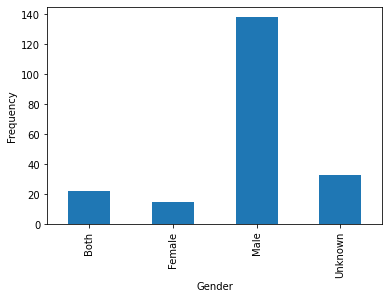

In [468]:
df.groupby("Gender")["Name"].count().plot(kind="bar").set_ylabel("Frequency")

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Professors per Year')]

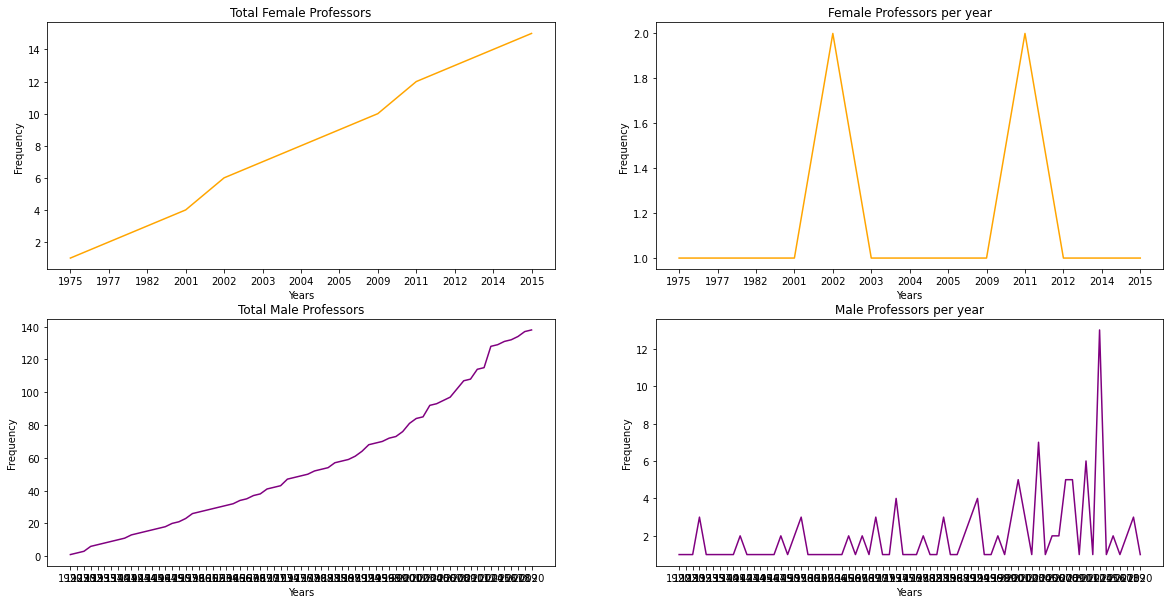

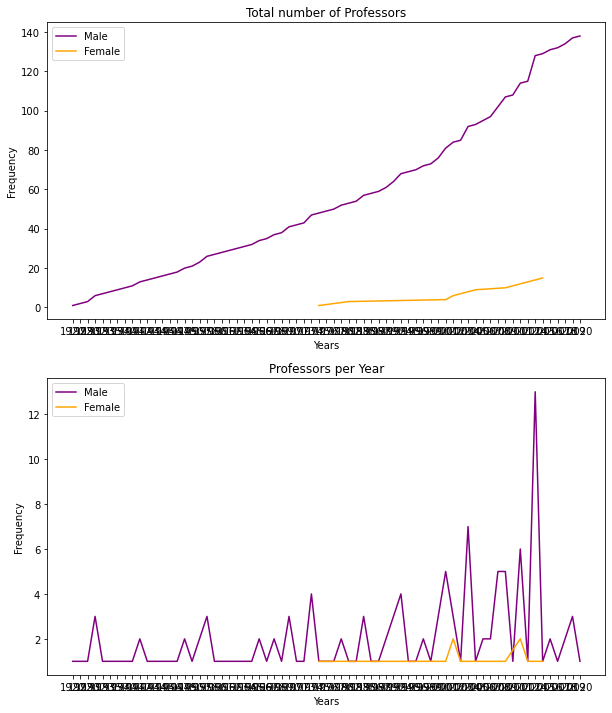

In [540]:
# plot of the count of male and female names in each year
by_year = df.groupby(["Gender","Year"])[["Actor"]].count()
fig, ax = plt.subplots(2, 2, figsize = (20,10))


ax[0,0].plot(by_year.loc["Female"].index.get_level_values(0), by_year.loc["Female"].cumsum(), c = "Orange")
ax[0,0].set(xlabel = "Years", ylabel = "Frequency", title = "Total Female Professors")

ax[0,1].plot(by_year.loc["Female"].index.get_level_values(0), by_year.loc["Female"], c = "Orange")
ax[0,1].set(xlabel = "Years", ylabel = "Frequency", title = "Female Professors per year")

ax[1,0].plot(by_year.loc["Male"].index.get_level_values(0), by_year.loc["Male"].cumsum(), c = "Purple")
ax[1,0].set(xlabel = "Years", ylabel = "Frequency", title = "Total Male Professors",)

ax[1,1].plot(by_year.loc["Male"].index.get_level_values(0), by_year.loc["Male"], c = "Purple")
ax[1,1].set(xlabel = "Years", ylabel = "Frequency", title = "Male Professors per year")

fig, ax = plt.subplots(2, figsize=(10,12))
ax[0].plot(by_year.loc["Male"].index.get_level_values(0), by_year.loc["Male"].cumsum(), c = "Purple", label = "Male")
ax[0].plot(by_year.loc["Female"].index.get_level_values(0), by_year.loc["Female"].cumsum(), c = "Orange", label = "Female")
ax[0].legend()
ax[0].set(xlabel = "Years", ylabel = "Frequency", title = "Total number of Professors")

ax[1].plot(by_year.loc["Male"].index.get_level_values(0), by_year.loc["Male"], c = "Purple", label = "Male")
ax[1].plot(by_year.loc["Female"].index.get_level_values(0), by_year.loc["Female"], c = "Orange", label = "Female")
ax[1].legend()
ax[1].set(xlabel = "Years", ylabel = "Frequency", title = "Professors per Year")

In [500]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
np.arrange